In [164]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [165]:
customers_dataset = pd.read_csv('olist_customers_dataset.csv')
order_items       = pd.read_csv('olist_order_items_dataset.csv')
order             = pd.read_csv('olist_orders_dataset.csv')

изучаем данные:

In [166]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [167]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [168]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [169]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


в данных есть shipping_limit_date, преобразуем его в тип дататайм

In [170]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [171]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [172]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


в данных снова есть даты, преобразуем их, но уже с помощью parse 

In [173]:
order = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [174]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


1. Сколько у нас пользователей, которые совершили покупку только один раз? 

рассмотрим заказы в разрезе статусов

In [175]:
order.groupby('order_status', as_index=False).agg({'order_id': 'count'})

,order_status,order_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


•	created —  создан
•	approved —  подтверждён
•	invoiced —  выставлен счёт
•	processing —  в процессе сборки заказа
•	shipped —  отгружен со склада
•	delivered —  доставлен пользователю
•	unavailable —  недоступен
•	canceled —  отменён


можно предположить, что нам нужны только заказы со статусом доставлен, но в данных есть еще информация о времени создания заказов, подтверждения оплаты, передачи заказов и т.д., поэтому стоит ее тоже изучить

In [176]:
order.loc[order.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36265,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06


из данных кажется, что заказ попадает в логистическую службу только после подтверждения оплаты, но так ли это на самом деле, нужно проверить

In [177]:
order.loc[order.order_status == 'delivered'].isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

теперь видно, что даже доставленные заказы могут быть без подтверждения оплаты, таких заказов немного, это может быть просто ошибкой статуса или еще чем-то, но лучше такие данные не использовать в расчетах количества покупок. Есть еще пропущенные даты передачи в логистику и доставку, лучше эти данные также не использовать

Итак, покупкой будем считать заказы с order_status равным delivered и заполненной информацией о датах подтверждения оплаты и доставки


подготовим данные по заказам 

In [178]:
orders_delivered = order.loc[order.order_status == 'delivered']

In [179]:
orders_delivered.shape

(96478, 8)

очистим от данных, где нет дат подтвержения оплаты и доставки 

In [180]:
orders_delivered_clear = orders_delivered.dropna()

In [181]:
orders_delivered_clear.shape

(96455, 8)

далее, нам нужно объединить таблицу покупок с таблицей пользователей, чтобы получить именно уникальных пользователей

Т е по факту, нам нужно сгруппировать пользователей по customer_unique_id и посчитать order_id, где статус заказа будет «доставлен» плюс заполнены поля с датами оплаты и доставки, а потом выбрать только тех покупателей, где кол-во заказов будет равно единице

применяем внутренний джоин, так как нам нужны только общие данные из двух таблиц, ключ можно не указывать, так как в таблицах всего один общий столбец 

In [182]:
orders_delivered_clear_customer = orders_delivered_clear.merge(customers_dataset)

In [183]:
orders_delivered_clear_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


проверяем правильность объединения, все ли строки сохранены

In [184]:
orders_delivered_clear_customer.shape

(96455, 12)

In [185]:
purchases = orders_delivered_clear_customer.groupby('customer_unique_id', as_index=False) \
                                           .agg({'order_id':'count'}) \
                                           .rename(columns={'order_id': 'quantity_orders'}) 

In [186]:
purchases

,customer_unique_id,quantity_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,1
93332,fffea47cd6d3cc0a88bd621562a9d061,1
93333,ffff371b4d645b6ecea244b27531430a,1
93334,ffff5962728ec6157033ef9805bacc48,1


у нас 93 336 уникальных пользователей с покупками

In [187]:
one_purchase = orders_delivered_clear_customer.groupby('customer_unique_id', as_index=False) \
                                               .agg({'order_id':'count'}) \
                                               .query('order_id==1') \
                                               .sum()

In [188]:
one_purchase

customer_unique_id    0000366f3b9a7992bf8c76cfdf3221e20000b849f77a49...
order_id                                                          90536
dtype: object

ответ: 90 536 пользователей совершили покупку только один раз, т.е 97% покутелей не возвращаются за второй покупкой

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

In [189]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


проверяем типы данных, так как в этом задании нам необходимо работать с типом данных дата

In [190]:
order.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

отправной точкой будет дата создания заказа, данные будем группировать по месяцу создания заказов

In [191]:
order['order_creation_year'] = order.order_purchase_timestamp.dt.year
order['order_creation_month'] = order.order_purchase_timestamp.dt.month


In [192]:
order['creation_period'] = order.order_purchase_timestamp.dt.to_period('M')

In [193]:
order.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_creation_year                       int64
order_creation_month                      int64
creation_period                       period[M]
dtype: object

In [194]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_creation_year,order_creation_month,creation_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,2018-02


In [195]:
not_delivered = order.loc[order.order_status != 'delivered'] \
                              .groupby(['creation_period', 'order_status'], as_index=False) \
                              .agg({'order_id': 'count'}) \
                              .rename(columns={'order_id': 'quantity'}) \
                              .pivot(index='order_status', columns='creation_period', values='quantity') \
                              .fillna(0) 

In [196]:
not_delivered

creation_period,2016-09,2016-10,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
order_status,,,,,,,,,,,,,,,,,,,,,
approved,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
canceled,2.0,24.0,3.0,17.0,33.0,18.0,29.0,16.0,28.0,27.0,...,34.0,73.0,26.0,15.0,24.0,18.0,41.0,84.0,15.0,4.0
created,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
invoiced,0.0,18.0,12.0,11.0,3.0,14.0,16.0,11.0,7.0,20.0,...,15.0,6.0,23.0,14.0,24.0,3.0,13.0,23.0,0.0,0.0
processing,0.0,2.0,9.0,32.0,23.0,10.0,23.0,12.0,11.0,18.0,...,29.0,6.0,9.0,8.0,6.0,0.0,1.0,0.0,0.0,0.0
shipped,1.0,8.0,16.0,21.0,45.0,49.0,55.0,47.0,56.0,41.0,...,74.0,57.0,133.0,99.0,54.0,43.0,60.0,47.0,1.0,0.0
unavailable,0.0,7.0,10.0,45.0,32.0,9.0,31.0,24.0,52.0,32.0,...,48.0,30.0,17.0,5.0,16.0,4.0,18.0,7.0,0.0,0.0


для дальнейших расчетов перестоим таблицу в более удобном формате

In [197]:
not_delivered = order.loc[order.order_status != 'delivered'] \
                              .groupby(['creation_period', 'order_status'], as_index=False) \
                              .agg({'order_id': 'count'}) \
                              .rename(columns={'order_id': 'quantity'}) \
                              .pivot(index='creation_period', columns='order_status', values='quantity').reset_index() \
                              .fillna(0) 

Итак, по разным причинам в разные месяцы не доставляется следующее кол-во заказов:

In [198]:
not_delivered

order_status,creation_period,approved,canceled,created,invoiced,processing,shipped,unavailable
0,2016-09,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,2016-10,0.0,24.0,0.0,18.0,2.0,8.0,7.0
2,2017-01,0.0,3.0,0.0,12.0,9.0,16.0,10.0
3,2017-02,1.0,17.0,0.0,11.0,32.0,21.0,45.0
4,2017-03,0.0,33.0,0.0,3.0,23.0,45.0,32.0
5,2017-04,1.0,18.0,0.0,14.0,10.0,49.0,9.0
6,2017-05,0.0,29.0,0.0,16.0,23.0,55.0,31.0
7,2017-06,0.0,16.0,0.0,11.0,12.0,47.0,24.0
8,2017-07,0.0,28.0,0.0,7.0,11.0,56.0,52.0
9,2017-08,0.0,27.0,0.0,20.0,18.0,41.0,32.0


в среднем не доставляется по разным причинам:

In [199]:
not_delivered.mean().round(0)

order_status
approved        0.0
canceled       26.0
created         0.0
invoiced       13.0
processing     13.0
shipped        46.0
unavailable    25.0
dtype: float64

Итак, в среднем в месяц происходит 26 отмен заказов, а у 25 заказов стоит статус "недоступен". Больше всего заказов находятся в процессе доставки - отгружены со склада, и в среднем по 13 заказов - в процессе сборки либо в ожидании оплаты.
Из предыдущей таблицы видно, что распределение недоставленых заказов по месяцам неравномерно, поэтому стоит рассмотреть их в динамике относительно общего количества заказов

In [200]:
all_status = order.groupby(['creation_period', 'order_status'], as_index=False) \
                              .agg({'order_id': 'count'}) \
                              .rename(columns={'order_id': 'quantity'}) \
                              .pivot(index='creation_period', columns='order_status', values='quantity').reset_index() \
                              .fillna(0) 

посчитаем общее количества заказов

In [201]:
all_status['all_orders'] = all_status.approved+all_status.canceled+all_status.created+all_status.delivered+all_status.invoiced+all_status.processing+all_status.shipped+all_status.unavailable

отставим только нужные нам столбцы

In [202]:
all_status=all_status.drop(['approved', 'created', 'delivered'], 1)

посмотрим динамику относительно общего количества заказов

In [203]:
all_status['canceled']= all_status.canceled/all_status.all_orders
all_status['invoiced']= all_status.invoiced/all_status.all_orders
all_status['processing']= all_status.processing/all_status.all_orders
all_status['shipped']= all_status.shipped/all_status.all_orders
all_status['unavailable']= all_status.unavailable/all_status.all_orders

In [204]:
all_status.round(2)

order_status,creation_period,canceled,invoiced,processing,shipped,unavailable,all_orders
0,2016-09,0.50,0.00,0.00,0.25,0.00,4.0
1,2016-10,0.07,0.06,0.01,0.02,0.02,324.0
2,2016-12,0.00,0.00,0.00,0.00,0.00,1.0
3,2017-01,0.00,0.02,0.01,0.02,0.01,800.0
4,2017-02,0.01,0.01,0.02,0.01,0.03,1780.0
5,2017-03,0.01,0.00,0.01,0.02,0.01,2682.0
6,2017-04,0.01,0.01,0.00,0.02,0.00,2404.0
7,2017-05,0.01,0.00,0.01,0.01,0.01,3700.0
8,2017-06,0.00,0.00,0.00,0.01,0.01,3245.0
9,2017-07,0.01,0.00,0.00,0.01,0.01,4026.0


из таблицы видно, что в начале и в конце рассматриваемого периода данные по общему кол-ву заказов сильно отличаются и эти периоды лучше удалить 

In [205]:
all_status = all_status.drop(all_status[all_status.all_orders<1000].index)


In [206]:
all_status.round(2)

order_status,creation_period,canceled,invoiced,processing,shipped,unavailable,all_orders
4,2017-02,0.01,0.01,0.02,0.01,0.03,1780.0
5,2017-03,0.01,0.00,0.01,0.02,0.01,2682.0
6,2017-04,0.01,0.01,0.00,0.02,0.00,2404.0
7,2017-05,0.01,0.00,0.01,0.01,0.01,3700.0
8,2017-06,0.00,0.00,0.00,0.01,0.01,3245.0
9,2017-07,0.01,0.00,0.00,0.01,0.01,4026.0
10,2017-08,0.01,0.00,0.00,0.01,0.01,4331.0
11,2017-09,0.00,0.00,0.01,0.01,0.01,4285.0
12,2017-10,0.01,0.00,0.00,0.01,0.01,4631.0
13,2017-11,0.00,0.00,0.00,0.01,0.01,7544.0


для наглядности построим графики по каждой причине недоставки

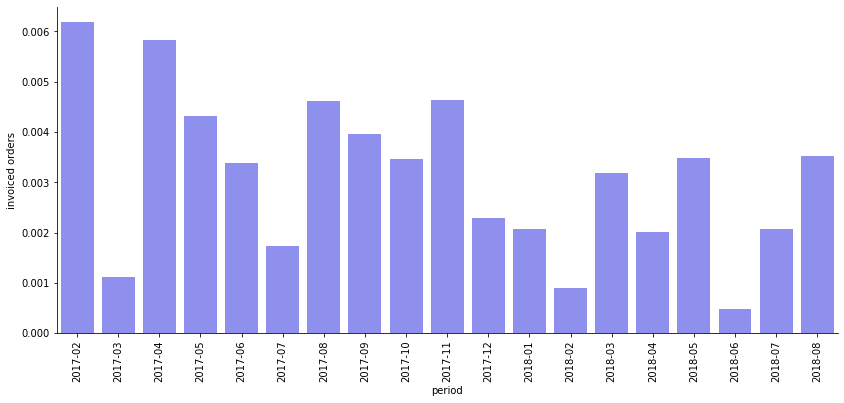

In [207]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="creation_period", y="invoiced", data=all_status, color='blue', alpha=0.5)
ax.set(xlabel='period', ylabel='invoiced orders')
plt.xticks(rotation=90)
sns.despine()  # убрать часть рамки графика
plt.show()

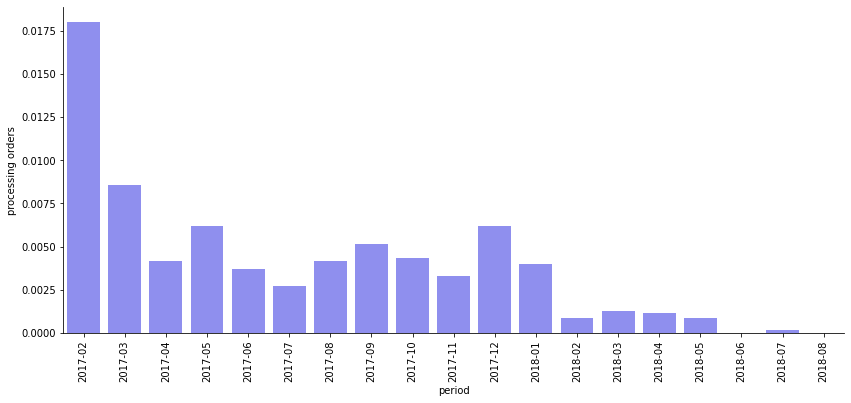

In [208]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="creation_period", y="processing", data=all_status, color='blue', alpha=0.5)
ax.set(xlabel='period', ylabel='processing orders')
plt.xticks(rotation=90)
sns.despine()  # убрать часть рамки графика
plt.show()

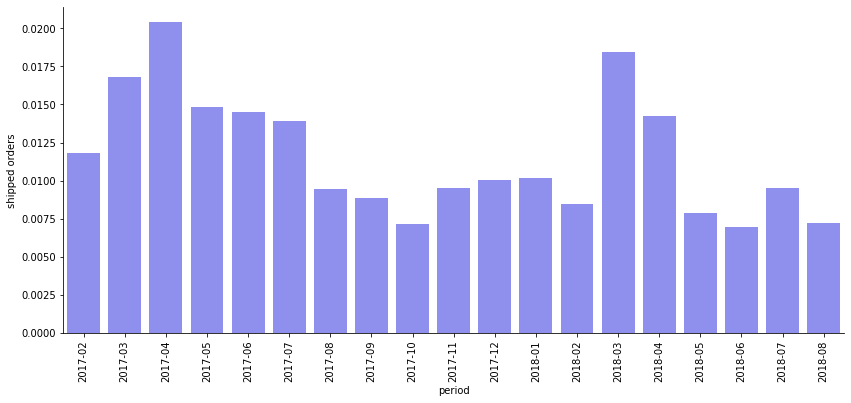

In [209]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="creation_period", y="shipped", data=all_status, color='blue', alpha=0.5)
ax.set(xlabel='period', ylabel='shipped orders')
plt.xticks(rotation=90)
sns.despine()  # убрать часть рамки графика
plt.show()

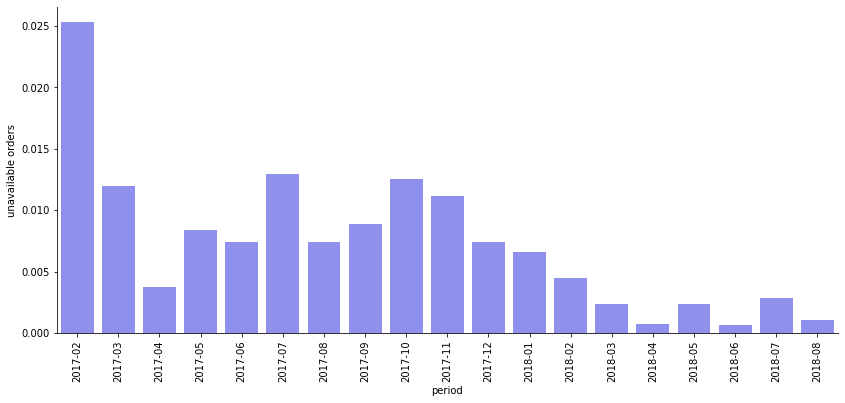

In [210]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="creation_period", y="unavailable", data=all_status, color='blue', alpha=0.5)
ax.set(xlabel='period', ylabel='unavailable orders')
plt.xticks(rotation=90)
sns.despine()  # убрать часть рамки графика
plt.show()

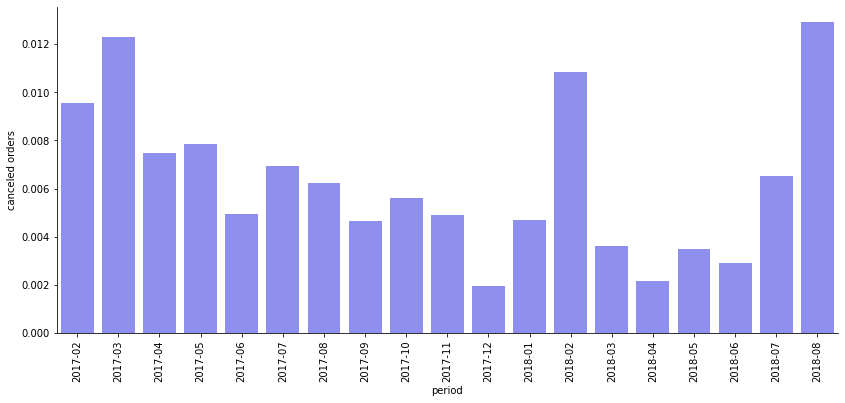

In [211]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x="creation_period", y="canceled", data=all_status, color='blue', alpha=0.5)
ax.set(xlabel='period', ylabel='canceled orders')
plt.xticks(rotation=90)
sns.despine()  # убрать часть рамки графика
plt.show()

Итак,  из графиков видно, что в начале 2017 года наблюдались проблемы в процессах сборки и со статусом неедоступен, которые получилось разрешить. Кажется (но для подтверждения мало данных) есть некая сезонность - рост в весенние периоды числа заказов для статусов отгружен со склада и отменен, но в отменах есть еще выброс в конце изучаемолго периода.

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

покупается т е заказывается клиентом, так как в момент заказа клиент не знает, в какой день будет доставка, будет ли отменен его заказ и т.д.

преобразуем данные, чтобы найти дни недели 

In [212]:
order['created_weekday'] = order.order_purchase_timestamp.dt.weekday
order['created_day_name'] = order.order_purchase_timestamp.dt.day_name()

In [213]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_creation_year,order_creation_month,creation_period,created_weekday,created_day_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,0,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,2018-07,1,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2018-08,2,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,2017-11,5,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,2018-02,1,Tuesday


In [214]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


посчитаем, сколько у нас всего товаров и какие из них чаще покупают

In [215]:
order_items.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
4dfb66a2572e0ce387cac89ce7a343e4      1
bff799c85e5634f63ec5c505220d1cde      1
c7208c176705ee9e839f9ada9401d4c6      1
25640ad1216178967884d69ebe5140cc      1
84d587fc7738e0359fa9ec3e9620c45c      1
Name: product_id, Length: 32951, dtype: int64

у нас 32 951 продукта, чаще всего заказывают aca2eb7d00ea1a7b8ebd4e68314663af, за рассматриваемый период данный товар купили, т е заказали 527 раз    

объединим таблицу заказов с информацией о датах с таблицей товарных позиций по ID заказа 

In [216]:
weekday_frequency= order_items.merge(order, on='order_id') 

In [217]:
weekday_frequency.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_creation_year,order_creation_month,creation_period,created_weekday,created_day_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017,9,2017-09,2,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017,4,2017-04,2,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018,1,2018-01,6,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018,8,2018-08,2,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017,2,2017-02,5,Saturday


мы знаем, что у нас есть позиции, которые заказывают достаточно часто, вряд ли люди делают это в один день, поэтому выведим сводную таблицу всех дней недели и всех товаров

In [218]:
weekday_frequency_all_product = weekday_frequency.groupby(['product_id', 'created_day_name'], as_index=False) \
                                                 .agg({'order_item_id': 'count'}) \
                                                 .rename(columns={'order_item_id': 'quantity'}) \
                                                 .pivot(index='product_id', columns='created_day_name', values='quantity') \
                                                 .fillna(0) 

In [219]:
weekday_frequency_all_product

created_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
fff81cc3158d2725c0655ab9ba0f712c,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fff9553ac224cec9d15d49f5a263411f,1.0,0.0,0.0,0.0,0.0,0.0,0.0


но, если говорить о самом "продаваемом" дне для компании без учета продукта, то это Monday. За рассматриваемый период по понедельникам было заказано 18 393 продуктов

In [220]:
weekday_frequency_all_product.sum()

created_day_name
Friday       16039.0
Monday       18393.0
Saturday     12168.0
Sunday       13416.0
Thursday     16797.0
Tuesday      18237.0
Wednesday    17600.0
dtype: float64

И наконец, посмотрим по каждому товару в какой день недели товар чаще всего покупается:

In [221]:
weekday_frequency_each_product =  weekday_frequency.groupby(['product_id', 'created_day_name'], as_index=False) \
                                                 .agg({'order_item_id': 'count'}) \
                                                 .rename(columns={'order_item_id': 'quantity'}) \
                                                 .pivot(index='product_id', columns='created_day_name', values='quantity') \
                                                 .fillna(0) \
                                                 .idxmax(axis=1)

In [222]:
weekday_frequency_each_product

product_id
00066f42aeeb9f3007548bb9d3f33c38       Sunday
00088930e925c41fd95ebfe695fd2655      Tuesday
0009406fd7479715e4bef61dd91f2462     Thursday
000b8f95fcb9e0096488278317764d19       Friday
000d9be29b5207b54e86aa1b1ac54872      Tuesday
                                      ...    
fff6177642830a9a94a0f2cba5e476d1     Saturday
fff81cc3158d2725c0655ab9ba0f712c       Monday
fff9553ac224cec9d15d49f5a263411f       Friday
fffdb2d0ec8d6a61f0a0a0db3f25b441      Tuesday
fffe9eeff12fcbd74a2f2b007dde0c58    Wednesday
Length: 32951, dtype: object


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 


возьмем таблицу из первого задания, где уже предобработанные данные, содержащие только информацию о доставленных товарах объединенные с покупателями

In [223]:
orders_delivered_clear_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


день доставки от покупателя не зависит, поэтому будем считать днем покупки день заказа 

преобразуем order_purchase_timestamp в дату

In [224]:
orders_delivered_clear_customer['creation_period'] = orders_delivered_clear_customer.order_purchase_timestamp.dt.to_period('M')

In [225]:
orders_delivered_clear_customer.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
creation_period                       period[M]
dtype: object

In [226]:
orders_delivered_clear_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,creation_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


посчитаем кол-во покупок по месяцам для каждого покупателя

In [227]:
purchases_by_month= orders_delivered_clear_customer.groupby(['customer_unique_id', 'creation_period'], as_index=False)\
                                                    .agg({'order_id': 'count'})\
                                                    .rename(columns={'order_id': 'quantity_purchases'}) \

In [228]:
purchases_by_month

,customer_unique_id,creation_period,quantity_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
95166,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
95167,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
95168,ffff371b4d645b6ecea244b27531430a,2017-02,1
95169,ffff5962728ec6157033ef9805bacc48,2018-05,1


сгенерим таблицу, где будет указано кол-во недель в каждом месяце

In [229]:
df = pd.DataFrame({'date': pd.date_range('20160901', periods=26, freq='M')})
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['days_in_month'] = df['date'].dt.days_in_month

In [230]:
df['weeks_in_month'] = df['days_in_month']/7
df['date'] = df['date'].dt.to_period('M')

In [231]:
df

,date,year,month,days_in_month,weeks_in_month
0,2016-09,2016,9,30,4.285714
1,2016-10,2016,10,31,4.428571
2,2016-11,2016,11,30,4.285714
3,2016-12,2016,12,31,4.428571
4,2017-01,2017,1,31,4.428571
5,2017-02,2017,2,28,4.000000
6,2017-03,2017,3,31,4.428571
7,2017-04,2017,4,30,4.285714
8,2017-05,2017,5,31,4.428571
9,2017-06,2017,6,30,4.285714


оставим только столбец с датой и кол-вом недель в каждом месяце 

In [232]:
df=df.drop(['year', 'month', 'days_in_month'], 1)

для объединения переназовем столбец с датой

In [233]:
df=df.rename(columns={'date': 'creation_period'})

объединим сгенерированную таблицу с данными о покупках, чтобы не потерять данные из таблицы purchases_by_month, воспользуемся left объединением

In [234]:
purchases_per_week = purchases_by_month.merge(df, how='left', on='creation_period') 

In [235]:
purchases_per_week

,customer_unique_id,creation_period,quantity_purchases,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714
...,...,...,...,...
95166,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,4.285714
95167,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,4.428571
95168,ffff371b4d645b6ecea244b27531430a,2017-02,1,4.000000
95169,ffff5962728ec6157033ef9805bacc48,2018-05,1,4.428571


In [236]:
purchases_per_week['avg_purchases_week'] = purchases_per_week.quantity_purchases/purchases_per_week.weeks_in_month

In [237]:
purchases_per_week

,customer_unique_id,creation_period,quantity_purchases,weeks_in_month,avg_purchases_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333
...,...,...,...,...,...
95166,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,4.285714,0.233333
95167,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,4.428571,0.225806
95168,ffff371b4d645b6ecea244b27531430a,2017-02,1,4.000000,0.250000
95169,ffff5962728ec6157033ef9805bacc48,2018-05,1,4.428571,0.225806


5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

так как нам нужно найти retention, нам нужна информация о покупках, возьмем таблицу из первого задания, где уже предобработанные данные, содержащие только информацию о доставленных товарах объединенные с покупателями

In [238]:
orders_delivered_clear_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,creation_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


в задании просят период с января по декабрь, такие данные у нас есть только за 2017 год, поэтому оставляем данные только за этот год плюс добавляем два месяца 2018, чтобы посмотреть retention на 3й месяц для ноября и декабря 2017 года

In [239]:
need_data = orders_delivered_clear_customer.query("creation_period > '2016-12' & creation_period < '2018-03'")

In [240]:
need_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,creation_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05


найдем минимальную дату, т е дату первого заказа для каждого покупателя

In [241]:
need_data['min_creation_period'] = need_data.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [242]:
need_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,creation_period,min_creation_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-09
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07,2017-07
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05,2017-05


готовим таблицу в разрезе даты первого заказа (min_creation_period) и даты возвращения (creation_period)

In [243]:
retention = need_data.groupby(['min_creation_period', 'creation_period'], as_index=False)\
                       .nunique('customer_unique_id')\
                       .rename(columns={'customer_unique_id': 'quantity_customer'})

In [244]:
retention= retention[['min_creation_period', 'creation_period', 'quantity_customer']]
retention

,min_creation_period,creation_period,quantity_customer
0,2017-01,2017-01,716
1,2017-01,2017-02,2
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
99,2017-12,2018-01,11
100,2017-12,2018-02,15
101,2018-01,2018-01,6843
102,2018-01,2018-02,23


так как ретеншен рассчитывается в относительных долях, а не в абсолютных, преобразуем данные:

In [245]:
retention_kogorta =  need_data.groupby(['min_creation_period', 'creation_period'], as_index=False)\
                          .nunique('customer_unique_id') \
                          .query('min_creation_period==creation_period')\
                          .rename(columns={'customer_unique_id': 'kogorta'})
retention_kogorta = retention_kogorta[['min_creation_period', 'kogorta']]      
retention_kogorta 

,min_creation_period,kogorta
0,2017-01,716
13,2017-02,1616
26,2017-03,2503
38,2017-04,2257
49,2017-05,3450
59,2017-06,3037
68,2017-07,3753
76,2017-08,4057
83,2017-09,4004
89,2017-10,4329


объединим две таблицы и считаем процент вернувшихся

In [246]:
retention = retention.merge(retention_kogorta, how='left', on='min_creation_period')
retention['returned'] =  round(retention.quantity_customer/retention.kogorta*100, 2)
retention

,min_creation_period,creation_period,quantity_customer,kogorta,returned
0,2017-01,2017-01,716,716,100.00
1,2017-01,2017-02,2,716,0.28
2,2017-01,2017-03,2,716,0.28
3,2017-01,2017-04,1,716,0.14
4,2017-01,2017-05,3,716,0.42
...,...,...,...,...,...
99,2017-12,2018-01,11,5338,0.21
100,2017-12,2018-02,15,5338,0.28
101,2018-01,2018-01,6843,6843,100.00
102,2018-01,2018-02,23,6843,0.34


In [247]:
retention = retention[['min_creation_period', 'creation_period', 'returned']]

преобразуем нашу таблицу в сводную

In [248]:
retention = retention.pivot(index='min_creation_period', columns='creation_period', values='returned') 

In [249]:
retention

creation_period,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
min_creation_period,,,,,,,,,,,,,,
2017-01,100.0,0.28,0.28,0.14,0.42,0.14,0.42,0.14,0.14,NaN,0.42,0.14,0.70,0.42
2017-02,NaN,100.00,0.19,0.31,0.12,0.43,0.12,0.25,0.19,0.06,0.19,0.12,0.31,0.12
2017-03,NaN,NaN,100.00,0.44,0.36,0.40,0.36,0.16,0.16,0.32,0.32,0.08,0.36,0.12
2017-04,NaN,NaN,NaN,100.00,0.62,0.22,0.18,0.27,0.27,0.35,0.31,0.31,0.18,0.27
2017-05,NaN,NaN,NaN,NaN,100.00,0.46,0.46,0.29,0.29,0.32,0.41,0.14,0.26,0.26
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.49,0.40,0.43,0.30,0.40,0.36,0.23,0.13
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.53,0.35,0.24,0.29,0.21,0.32,0.11
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.69,0.35,0.27,0.35,0.52,0.30
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.70,0.55,0.27,0.45,0.22


визуализируем данные

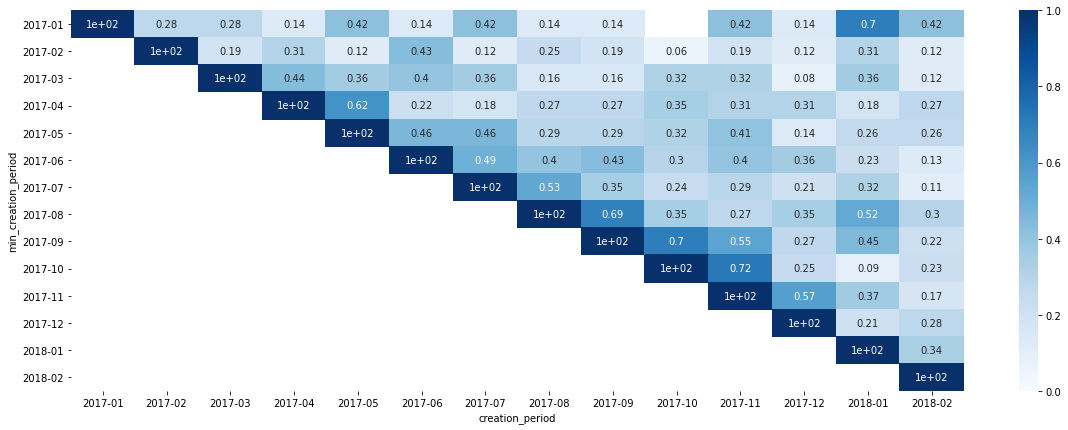

In [250]:
plt.figure(figsize=(20, 7)) 

ax = sns.heatmap(retention, annot=True, vmin=0, vmax=1 , cmap="Blues")


Итак, в период с января по декабрь 2017 года когорта 09-2017 - когорта с самым высоким retention на 3й месяц. В ноябре 2017 из когорты вернулось 0,55% пользователей

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

в методологии исследования говориться, что метод не очень применим в отраслях, где клиенты не возвращаются за покупками повторно. В наших данных мало пользователей с повторными покупками, их всего 2800 за весь период (3% всей пользовательской базы) или 1169 за полный 2017 год. Поэтому не стоит ограничивать данные одним годом и лучше взять весь период. Но, и тут есть некоторые проблемы, как известно из задания № 2 в начале и в конце рассматриваемого периода данные по общему кол-ву заказов сильно отличаются и эти периоды лучше удалить. Т е я планирую изучать аудиторию на данных за период с февраля 2017 по август 2018 включительно. 

нам нужны данные по деньгам, они есть в таблице товарных позиций, но так как нам нужны именно заказы, а в заказе может быть несколько товарных позиций и чтобы в дальнейшем избежать дублирования, таблицу сгруппируем именнно по заказам


проверим наше предположение, что в одном заказе может быть несколько позиций и чтобы понять order_item_id это все-таки порядковый номер или кол-во позиций в заказе, сгруппируем данные по заказам, отсортируем по order_item_id и посмотрим самый конец получившейся таблицы:

In [251]:
order_items.groupby('order_id').agg({'price': 'sum', 'order_item_id': 'count'}).sort_values('order_item_id').tail()

,price,order_item_id
order_id,,
428a2f660dc84138d969ccd69a0ab6d5,982.35,15
9ef13efd6949e4573a18964dd1bbe7f5,765.00,15
1b15974a0141d54e36626dca3fdc731a,2000.00,20
ab14fdcfbe524636d65ee38360e22ce8,1974.00,20
8272b63d03f5f79c56e9e4120aec44ef,31.80,21


посмотрим самый большой по кол-ву order_item_id заказ

In [252]:
order_items.query("order_id == '8272b63d03f5f79c56e9e4120aec44ef'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


итак, мы теперь знаем, что товары у нас пробиваются в заказе по одной позиции по порядку, т е нам нужно просто сгруппировать заказы и вывести прайс

In [253]:
order_money = order_items.groupby('order_id').agg({'price': 'sum'})

In [254]:
order_money

,price
order_id,
00010242fe8c5a6d1ba2dd792cb16214,58.90
00018f77f2f0320c557190d7a144bdd3,239.90
000229ec398224ef6ca0657da4fc703e,199.00
00024acbcdf0a6daa1e931b038114c75,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...
fffc94f6ce00a00581880bf54a75a037,299.99
fffcd46ef2263f404302a634eb57f7eb,350.00
fffce4705a9662cd70adb13d4a31832d,99.90


теперь обьединим таблицу order_money с таблицей заказов, но для этого поймем, какое объединение использовать

In [255]:
order.order_id.count()

99441

нам нужно левое обьединение (в таблице заказов больше заказов-строк, чем в таблице с деньгами), т е к таблице заказов будем присоединять таблицу с деньгами

In [256]:
order_money = order.merge(order_money, how='left', on = 'order_id')

посмотрим, какие поля не заполнились:

In [257]:
order_money.query('price.isna()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_creation_year,order_creation_month,creation_period,created_weekday,created_day_name,price
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017,11,2017-11,3,Thursday,NaN
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018,1,2018-01,2,Wednesday,NaN
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017,8,2017-08,0,Monday,NaN
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,2018,1,2018-01,0,Monday,NaN
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,2018,8,2018-08,1,Tuesday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,2018,1,2018-01,1,Tuesday,NaN
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,2018,8,2018-08,4,Friday,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,2018,9,2018-09,3,Thursday,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,2017,8,2017-08,2,Wednesday,NaN


подробней изучим статусы заказов, где нет данных по деньгам

In [258]:
order_money.query('price.isna()').groupby('order_status').agg({'order_id':'count'})

,order_id
order_status,
canceled,164
created,5
invoiced,2
shipped,1
unavailable,603


мы оставляем эти заказы, так как для сегментации нам нужны все пользователи и те, которые не успели оплатить свой заказ и те, которым заказ был не доставлен, а деньги возвращены

для корректного суммирования в будущем, проставим нули

In [259]:
order_money = order_money.fillna(0)

In [260]:
order_money.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_creation_year              0
order_creation_month             0
creation_period                  0
created_weekday                  0
created_day_name                 0
price                            0
dtype: int64

теперь объединим данные с данными о клиентах, в разрезе каждого клиента найдем дату последнего заказа, кол-во заказов и сумму денег 

для объединения проверим, возможно ли дублирование данных

In [261]:
order_money.customer_id.nunique()

99441

In [262]:
customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


воспользуемся внутренним объединением, так как в таблицах одинаковое кол-во строк 

In [263]:
orders_customer = order_money.merge(customers_dataset)

находим дату последнего заказа

In [264]:
orders_customer['max_creation_period'] = orders_customer.groupby('customer_unique_id')['order_purchase_timestamp']\
.transform('max')

In [265]:
orders_customer.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
order_creation_year                       int64
order_creation_month                      int64
creation_period                       period[M]
created_weekday                           int64
created_day_name                         object
price                                   float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
max_creation_period              datetime64[ns]
dtype: object

для метрики "давность" добавим столбец с датой, от которой будем искать дни от последней покупки пользователя. Так как у нас старые данные и мы ограничили их августом 2018, дату, от которой нужно искать, логичней всего прописать 01 сентбря 2018

In [266]:
orders_customer['date_for_Rec'] = '2018-09-01'

теперь столбец нужно перевести в формат to_datetimeтоже 

In [267]:
orders_customer.date_for_Rec= pd.to_datetime(orders_customer.date_for_Rec)

In [268]:
orders_customer.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
order_creation_year                       int64
order_creation_month                      int64
creation_period                       period[M]
created_weekday                           int64
created_day_name                         object
price                                   float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
max_creation_period              datetime64[ns]
date_for_Rec                     datetime64[ns]
dtype: object

отсекаем начало и конец периода, так как эти данные по общему кол-ву заказов сильно отличаются (мы выяснили это в задании 2) и эти периоды лучше удалить. Т е я планирую изучать данные за период с февраля 2017 по август 2018 включительно.

In [269]:
orders_customer= orders_customer.query("'2017-01'<creation_period<'2018-09'")

In [270]:
orders_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_creation_year,order_creation_month,creation_period,created_weekday,created_day_name,price,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,max_creation_period,date_for_Rec
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,0,Monday,29.99,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-02 10:56:33,2018-09-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,2018-07,1,Tuesday,118.70,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-24 20:41:37,2018-09-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2018-08,2,Wednesday,159.90,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08 08:38:49,2018-09-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,2017-11,5,Saturday,45.00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18 19:28:06,2018-09-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,2018-02,1,Tuesday,19.90,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13 21:18:39,2018-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,2017-03,3,Thursday,72.00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-09 09:54:05,2018-09-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,2018-02,1,Tuesday,174.90,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-06 12:58:58,2018-09-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,2017-08,6,Sunday,205.99,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-27 14:46:43,2018-09-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,2018-01,0,Monday,359.98,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:28:27,2018-09-01


оставляем только нужные нам для расчета метрик столбцы

In [271]:
orders_customer_need= orders_customer[['customer_unique_id', 'max_creation_period', 'date_for_Rec', 'order_id', 'price']]

In [272]:
orders_customer_need 

,customer_unique_id,max_creation_period,date_for_Rec,order_id,price
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2018-09-01,e481f51cbdc54678b7cc49136f2d6af7,29.99
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-09-01,53cdb2fc8bc7dce0b6741e2150273451,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-09-01,47770eb9100c2d0c44946d9cf07ec65d,159.90
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2018-09-01,949d5b44dbf5de918fe9c16f97b45f8a,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-09-01,ad21c59c0840e6cb83a9ceb5573f8159,19.90
...,...,...,...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2018-09-01,9c5dedf39a927c1b2549525ed64a053c,72.00
99437,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-09-01,63943bddc261676b46f01ca7ac2f7bd8,174.90
99438,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2018-09-01,83c1379a015df1e13d02aae0204711ab,205.99
99439,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-09-01,11c177c8e97725db2631073c19f07b62,359.98


расчитываем метрику "давность" т е количество дней с момента последней покупки

In [273]:
orders_customer_need['Recency'] = (orders_customer_need.date_for_Rec- orders_customer_need.max_creation_period).dt.days

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [274]:
orders_customer_need

,customer_unique_id,max_creation_period,date_for_Rec,order_id,price,Recency
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2018-09-01,e481f51cbdc54678b7cc49136f2d6af7,29.99,333
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-09-01,53cdb2fc8bc7dce0b6741e2150273451,118.70,38
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-09-01,47770eb9100c2d0c44946d9cf07ec65d,159.90,23
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2018-09-01,949d5b44dbf5de918fe9c16f97b45f8a,45.00,286
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-09-01,ad21c59c0840e6cb83a9ceb5573f8159,19.90,199
...,...,...,...,...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2018-09-01,9c5dedf39a927c1b2549525ed64a053c,72.00,540
99437,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-09-01,63943bddc261676b46f01ca7ac2f7bd8,174.90,206
99438,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2018-09-01,83c1379a015df1e13d02aae0204711ab,205.99,369
99439,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-09-01,11c177c8e97725db2631073c19f07b62,359.98,235


подготавливаем RFM таблицу, группируем данные по пользователям, рассчитываем метрику "частота" = кол-во покупок у каждого клиента и метрику "доходность", в агрегацию заводим параметр давность с любой функцией (так как в разрезе клиента давность одинаковая) для выдачи столбца с данными

In [275]:
RFM = orders_customer_need.groupby(['customer_unique_id'], as_index=False)\
                 .agg({'Recency':'min', 'order_id': 'count', 'price': 'sum'})\
                 .rename(columns={'price': 'Monetary', 'order_id': 'Frequency'})

In [276]:
RFM

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,18.90
2,0000f46a3911fa3c0805444483337064,539,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,323,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,290,1,180.00
...,...,...,...,...
95037,fffcf5a5ff07b0908bd4e2dbc735a684,449,1,1570.00
95038,fffea47cd6d3cc0a88bd621562a9d061,264,1,64.89
95039,ffff371b4d645b6ecea244b27531430a,570,1,89.90
95040,ffff5962728ec6157033ef9805bacc48,121,1,115.00


Рассчитаем квинтили для метрик 'Recency' и 'Monetary', для 'Frequency' метод квинтилей не подойдет - у нас всего 3% пользователей возращаются за повторными заказами, поэтому назначим ранги на свое усмотрение, зная что основная часть имеет один заказ, а максимальное кол-во заказов у одного пользователя это 17.

In [277]:
quintiles = RFM[['Recency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 94.0, 0.4: 178.0, 0.6: 269.0, 0.8: 380.0},
 'Monetary': {0.2: 39.0, 0.4: 69.0, 0.6: 109.9, 0.8: 179.9}}

Присвоим ранги от 1 до 5. Для метрики "Давность" чем недавней (меньше дней) была покупка тем лучше (ранг 5), а для метрики "Доходность" - чем больше сумма денег - тем лучше, поэтому нужно прописать две функции для квинтилей и доп функцию для ручного назначения рангов для метрики "Частота"

In [278]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['Monetary'][.2]:
        return 1
    elif x <= quintiles['Monetary'][.4]:
        return 2
    elif x <= quintiles['Monetary'][.6]:
        return 3
    elif x <= quintiles['Monetary'][.8]:
        return 4
    else:
        return 5   
    
def f_score(x):
    if x <= 1:
        return 1
    elif 1 < x <= 3:
        return 2
    elif 3 < x <= 5:
        return 3
    elif 5 < x <= 14:
        return 4
    else:
        return 5  

проранжируем наших пользователей

In [279]:
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['Monetary'].apply(lambda x: m_score(x))

добавим для удобства единый столбец, определяющий для каждого пользователя его сегмент

In [280]:
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,539,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,323,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,290,1,180.00,2,1,5,215


проверим сегментацию пользователя с самым большим количеством заказов

In [281]:
RFM.query("customer_unique_id=='8d50f5eadf50201ccdcedfb9e2ac8455'")

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
52387,8d50f5eadf50201ccdcedfb9e2ac8455,11,17,729.62,5,5,5,555


Итак,  RFM-сегмент 123 (recency-давность = 1, frequency-частота = 2, monetary-доходность = 3) 

границы метрик recency лежат:

1 - свыше 381 дней

2 - от 270 до 380 дней

3 - от 179 до 269 дней

4 - от 95 до 178 дней

5 - до 94 дней

границы метрик frequency лежат:

1 - 1 заказ

2 - 2-3 заказа

3 - 4-5 заказов

4 - от 6 до 14 заказов

5 - от 15 заказов

границы метрик monetary лежат:

1 - до 39 ден. единиц (у е)

2 - от 40 до 69 у е 

3 - от 70 до 109,9 у е

4 - от 110 до 179,9 у е

5 - свыше 180 у е

